In [61]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import  mean_squared_error, mean_absolute_error
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from math import sqrt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import OneHotEncoder

data = pd.read_csv("model_data.csv")

In [2]:
# Separate Features from Labels
# For Features I get all columns except the last one
X = data.iloc[:, :-1].values

# For features I can about the Risk Score which is the last column
y = data.iloc[:, -1].values

In [3]:
# Encoding Categorical Values
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(),[9])] , remainder ='passthrough' )
X = np.array(ct.fit_transform(X))

In [4]:
# Test - Train
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [5]:
# Scale the data to ensure uniformity in the Linear Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# Model Linear Regression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [7]:
# Make Predictions
y_pred = regressor.predict(X_test)

In [8]:
# Show the values Vertically not Horizontally
np.set_printoptions(precision = 2)
print("Predictions VS Real Results")
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)), 1))


Predictions VS Real Results
[[43.84 34.4 ]
 [52.77 53.  ]
 [56.55 60.  ]
 ...
 [50.12 57.  ]
 [50.66 52.  ]
 [38.36 32.  ]]


In [9]:
# Show the results
results = pd.DataFrame({
    'Actual RiskScore': y_test,
    'Predicted RiskScore': y_pred
})

print(results.head())

   Actual RiskScore  Predicted RiskScore
0              34.4            43.839152
1              53.0            52.772369
2              60.0            56.554160
3              49.0            51.857723
4              47.0            37.745585


# Evaluation Metrics

# R2 Squared
It is also known as the coefficient of determination. This metric gives an indication of how good a model fits a given dataset. It indicates how close the regression line (i.e the predicted values plotted) is to the actual data values. The R squared value lies between 0 and 1 where 0 indicates that this model doesn't fit the given data and 1 indicates that the model fits perfectly to the dataset provided.

In [12]:
# R2 Squared
scores = cross_val_score(LinearRegression(), X, y,scoring='r2')
print("The R-squared is:", scores)
# The model does not fit the given data - low score

The R-squared is: [0.44 0.46 0.43 0.4  0.41]


# Mean Absolut Error
Mean Absolute Error(MAE) is the mean size of the mistakes in collected predictions. We know that an error basically is the absolute difference between the actual or true values and the values that are predicted. The absolute difference means that if the result has a negative sign, it is ignored.

Hence, MAE = True values – Predicted values

MAE takes the average of this error from every sample in a dataset and gives the output.

In [14]:
error = mean_absolute_error(y_test, y_pred)
print("The Mean Absolute Error is :", error)
print(f"{error} indicates that, on average, the model's predictions for the RiskScore deviate from the actual values by {error} units.")

The Mean Absolute Error is : 4.615360093815929
4.615360093815929 indicates that, on average, the model's predictions for the RiskScore deviate from the actual values by 4.615360093815929 units.


# Mean Squared Error
The Mean Absolute Error is the squared mean of the difference between the actual values and predictable values.
How do you Calculate MSE?

# Steps to calculate the MSE from a set of X and Y values:

1. First, Find the regression line.
2. Insert the X values into the linear regression equation to find the new Y values (Y’).
3. Subtract the new Y value from the original to get the error.
4. Square the values that you go as errors.
5. Add up the errors
6. Find the mean.


In [16]:
error_mse = mean_squared_error(y_test, y_pred)
print("The mean Squared error is", error)
print(f"The difference between the predicted and actual values is {error_mse}")
# It means now that we have high MSE that the points are dispersed widely around its central moment

The mean Squared error is 4.615360093815929
The difference between the predicted and actual values is 33.12248887164921


# Root Mean Squared Error
RMSE is the standard deviation of the errors which occur when a prediction is made on a dataset. This is the same as MSE (Mean Squared Error) but the root of the value is considered while determining the accuracy of the model.

In [18]:
root_mean_squared_error = sqrt(error_mse)
print("The root mean squared error is", root_mean_squared_error)
print(f"A Root Mean Squared Error (RMSE) of {root_mean_squared_error}  means that, on average, the predictions deviate from the actual values by {root_mean_squared_error} units on the same scale as the target variable.")

The root mean squared error is 5.755214059585378
A Root Mean Squared Error (RMSE) of 5.755214059585378  means that, on average, the predictions deviate from the actual values by 5.755214059585378 units on the same scale as the target variable.


# Feature Importance Analysis

C:\Users\user\AppData\Local\Temp\ipykernel_6848\1627924918.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_names_expanded, palette="viridis")


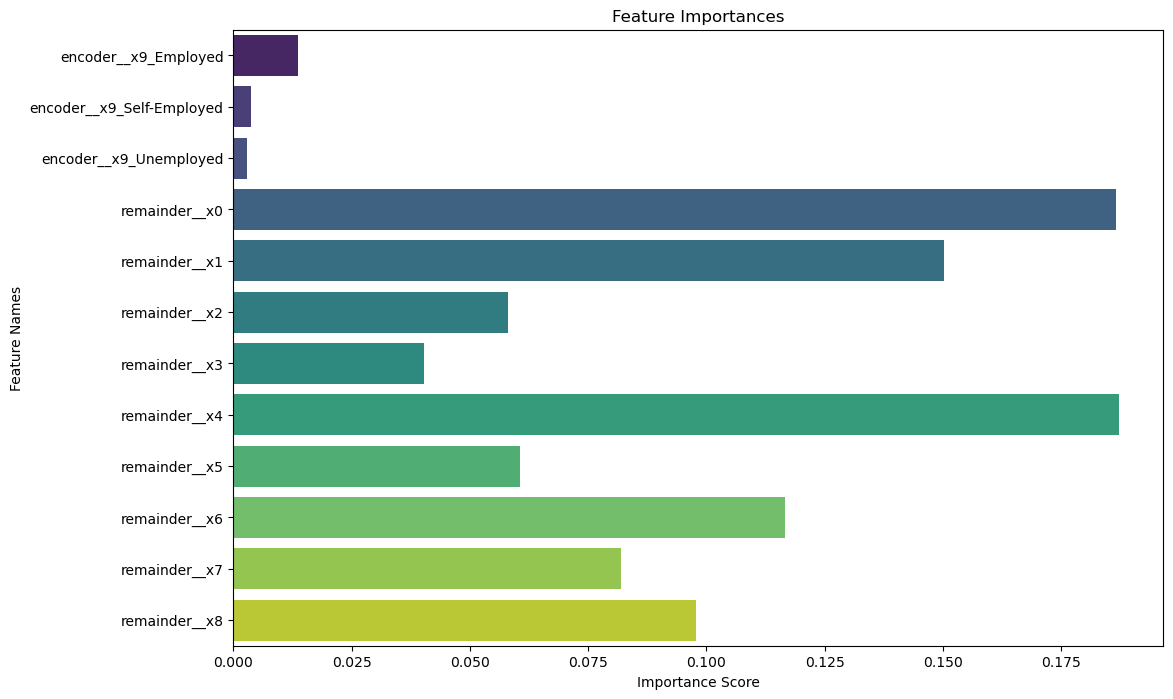

In [25]:
# Train the RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(X_train, y_train)

# Ensure feature names match X_train
if hasattr(ct, 'get_feature_names_out'):  # If using ColumnTransformer
    feature_names_expanded = ct.get_feature_names_out()
else:
    feature_names_expanded = [f'Feature_{i}' for i in range(X_train.shape[1])]

# Extract feature importances
feature_importances = forest.feature_importances_

# Verify lengths match
assert len(feature_importances) == len(feature_names_expanded), "Mismatch between features and feature names!"

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances, y=feature_names_expanded, palette="viridis")
plt.title('Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature Names')
plt.show()


In [27]:
# Accuracy Test
# Cross validation 3 because 10 is very heavy
#Incorporating cross-validation ensures the model generalizes well and avoids overfitting.
accuracies = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 3)
print(accuracies)

[0.42 0.43 0.43]


 # Visualizing Results

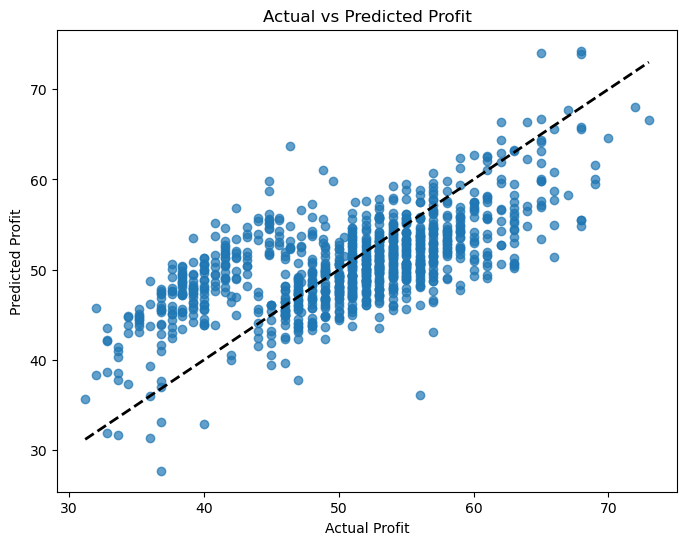

In [30]:
# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.title('Actual vs Predicted Profit')
plt.show()

# HyperParameter Tuning
Lasso and Ridge regularization techniques

#### Why Use a Pipeline?
Ensures consistent preprocessing (e.g., scaling) for both training and test splits.

#### Why Scale Features?
Regularization in Ridge and Lasso penalizes coefficients, which can be sensitive to feature magnitudes.


In [33]:
# Hyperparameter grid
from sklearn.pipeline import Pipeline

# Ridge Parameters Pipeline
ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

# lasso pipeline
lasso_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso())
])

# Ridge Hyperparameter grid
ridge_param_grid = {
    'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'ridge__fit_intercept': [True, False]
}

#Lasso Hyperparameter Grid
lasso_param_grid = {
    'lasso__alpha': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'lasso__fit_intercept': [True, False]
}

# Grid search for Ridge
ridge_grid_search = GridSearchCV(ridge_pipeline, ridge_param_grid, cv=2, scoring='neg_mean_squared_error')
ridge_grid_search.fit(X_train, y_train)

# Grid search for Lasso
lasso_grid_search = GridSearchCV(lasso_pipeline, lasso_param_grid, cv=5, scoring='neg_mean_squared_error')
lasso_grid_search.fit(X_train, y_train)

# Print the best parameters and score for Ridge
print("Best Parameters for Ridge:", ridge_grid_search.best_params_)
print("Best Score for Ridge:", -ridge_grid_search.best_score_)

# Print the best parameters and score for Lasso
print("Best Parameters for Lasso:", lasso_grid_search.best_params_)
print("Best Score for Lasso:", -lasso_grid_search.best_score_)




Best Parameters for Ridge: {'ridge__alpha': 10, 'ridge__fit_intercept': True}
Best Score for Ridge: 33.85352782861075
Best Parameters for Lasso: {'lasso__alpha': 0.01, 'lasso__fit_intercept': True}
Best Score for Lasso: 33.66286872590466


# Calculate Probability Of Defeault

In [40]:
# Threshold to convert the RiskScore into a variable that will indicate the default
# So the clients with score over 50 will have a critical chance to default in their loan 
threshold = 50

# Binary Target Value
data['Default'] = (data['RiskScore'] > threshold).astype(int)

In [44]:
# Features and target
X = data[['DebtToIncomeRatio', 'CreditScore', 'MonthlyDebtPayments', 
          'NetWorth', 'SavingsAccountBalance', 'PaymentHistory', 
          'BankruptcyHistory', 'LoanAmount', 'CreditCardUtilizationRate']]

# Binary target variable 1 then the user will default
y = data['Default']  

In [46]:
# Test - Train Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Logistic Regression - Since we need the Probability and not a Classification Problem we are still in the category of Regression Problems 

## Feature Scaling
Logistic regression uses the sigmoid function to produce the output of the model. This function is very sensitive to the scale of the features because it will map its inputs from 0 to 1.

In [65]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [67]:
# Train the Model

In [69]:
regressor = LogisticRegression()
regressor.fit(X_train_scaled, y_train)

LogisticRegression()

In [71]:
# Predicting the Probability of Default

In [77]:
probability = regressor.predict_proba(X_test_scaled)

# We also need to extract the probabilities / Thank you Chat GTP not did that in the first place and my algo did not work
df_probability =  probability[:, 1]

# Add to DataFrame for analysis
results = pd.DataFrame({
    'Client': range(len(df_probability)),
    'Probability_of_Default': df_probability
})

In [81]:
# Top Clients Probability of Default / It is based on the len of the df
print(results.sort_values(by='Probability_of_Default', ascending=False).head())

     Client  Probability_of_Default
137     137                0.999208
609     609                0.998968
701     701                0.998902
581     581                0.994387
157     157                0.993292


In [83]:
# Visualize High Risky Clients

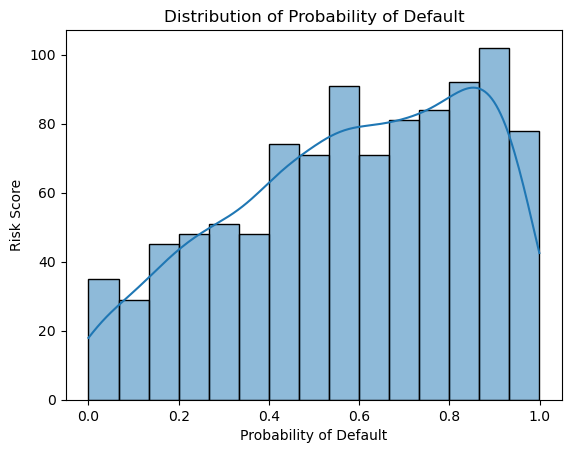

In [89]:
# Histogram of probabilities
sns.histplot(df_probability, bins=15, kde=True)
plt.title('Distribution of Probability of Default')
plt.xlabel('Probability of Default')
plt.ylabel('Risk Score')
plt.show()

In [91]:
# The higher we go to the risk score the more is the probability of the client not paying the loan

# Roc Auc Score
The ROC AUC score is the area under the ROC curve. It sums up how well a model can produce relative scores to discriminate between positive or negative instances across all classification thresholds. The ROC AUC score ranges from 0 to 1, where 0.5 indicates random guessing, and 1 indicates perfect performance.

In [99]:
from sklearn.metrics import roc_auc_score

auc_score = roc_auc_score(y_test, df_probability)
print(f"ROC-AUC Score: {auc_score:.2f}")
# Since the model is higher than the 0.5 then we avoid random guessing and we are close to perfect performance

ROC-AUC Score: 0.80


# Business Insight
 -- With the Probability of Default, you can:

1. Identify high-risk clients for targeted interventions.
2. Suggest personalized interest rates based on risk levels.
3. Simulate portfolio risks by aggregating probabilities.